In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 20})

In [2]:
dqn_training_df = pd.read_csv('training_dqn.csv', index_col=0)
dqn_testing_df = pd.read_csv('testing_dqn.csv', index_col=0)
dyna_training_df = pd.read_csv('dyna_model2/episode_results.csv', index_col=0)
dyna_testing_df = pd.read_csv('dyna_model2/test_results.csv', index_col=0)
print(dqn_training_df.columns)
print(dqn_testing_df.columns)
print(dyna_training_df.columns)
print(dyna_testing_df.columns)

Index(['episode_durations_dqn_aux', 'episode_durations_dqn_rnd'], dtype='object')
Index(['episode_durations_dqn_aux', 'episode_durations_dqn_rnd'], dtype='object')
Index(['reward', 'duration', 'qstep'], dtype='object')
Index(['reward', 'duration'], dtype='object')


In [14]:
# Merge the testing and training dataframes
dqn_training_df['epsiode_durations_dyna'] = dyna_training_df['duration']
dqn_testing_df['epsiode_durations_dyna'] = dyna_testing_df['duration']

df_train = -1 * dqn_training_df.copy()
df_test = -1 * dqn_testing_df.copy()
colum_names = ['DQN_aux', 'DQN_rnd', 'Dyna']
df_train.columns = colum_names
df_test.columns = colum_names

## Training Episode Duration

Create a plot where you compare the training performance of each agent: plot the environment
rewards achieved by each of the three agents during training. Comment on the results.

### Comments
As expected, the DQN agent with auxiliary rewards is the first agent to achieve the goal, it is more guided to solve the task. Following the Dyna agent leveraging the internal model representation, and then the DQN agent with non domain specific rewards.

           DQN_aux      DQN_rnd         Dyna
count  1000.000000  1000.000000  1000.000000
mean   -126.893000  -135.189000  -116.097000
std      15.077429    30.359628    28.469494
min    -145.000000  -200.000000  -200.000000
25%    -144.000000  -155.000000  -147.000000
50%    -114.000000  -149.000000  -106.000000
75%    -113.000000   -99.000000   -91.000000
max    -113.000000   -85.000000   -84.000000


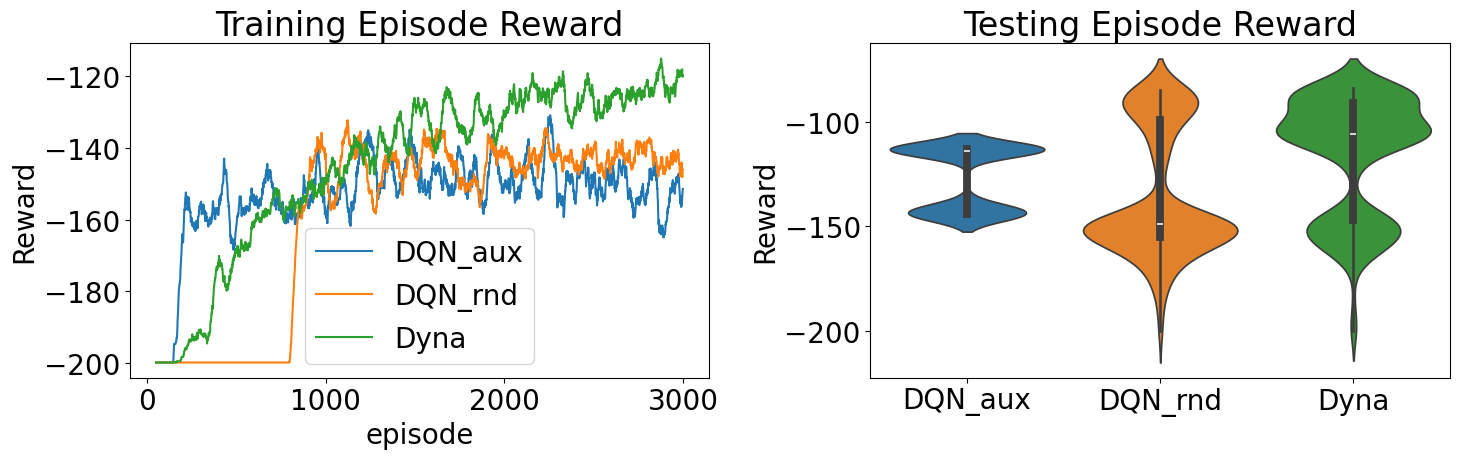

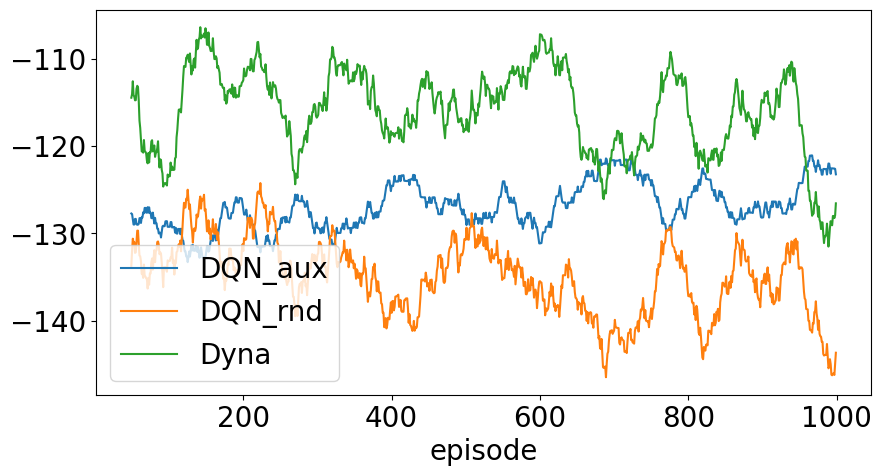

In [15]:
from scipy.__config__ import show

print(df_test.describe())

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = axes[0]
df_train.rolling(window=50).mean().plot(ax=ax, ylabel='Reward', title='Training Episode Reward')

ax = axes[1]
sns.violinplot(data=df_test, ax=ax)
ax.set_title('Testing Episode Reward')
ax.set_ylabel('Reward')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
df_test.rolling(window=50).mean().plot(ax=ax)
plt.show()

Now compare their testing performance on 1000 new episodes, each one initialized with a ran-
domly sampled seed as before: Set  = 0 and run each of the trained agents on testing environ-
ments. Make sure you are comparing the agents on the same set of seeds. Plot their performance
and comment.

### Comments
The Dyna agent shows the best performance among the models, achieving the goal faster on average. The DQN agent with auxiliary rewards is the second best, and the DQN agent with non domain specific rewards is the worst.
The DQN agent with auxiliary rewards presents less variance in the performance with 2 clear regimes. While the other agents have more variance in the performance.


## Compare DQN and Dyna in the way they approach the problem, and in the resulting behavior.

### Comments
The Dyna agent is model based while the DQN agent is model free. 
The Dyna agent is able to leverage the internal model representation to achieve better performance. This allows the agent explore the environment more efficiently and learn faster.
The Dyna agent also leverages its internal model representation to simulate the environment which makes is capable of planning ahead and take better decisions.